## Import Modules and Load csv File

In [121]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

cancerdf = pd.read_csv('Breast-Cancer-Wisconsin.csv')

## Impute missing values 

In [122]:
cancerdf.A7 = cancerdf.A7.replace('?',np.NaN)

Convert Column A7 to numeric value and count null values

In [123]:
s = pd.Series(cancerdf.A7)
cancerdf.A7 = pd.to_numeric(s)
print("The number of NaN:", s.isnull().sum())

The number of NaN: 16


Fill null values with the mean of the column

In [124]:
cancerdf = cancerdf.fillna(cancerdf.mean(skipna=True))

## Use KMeans Algorithm

Continue working with cleaned data using only columns A2 through A10

In [125]:
df=cancerdf.loc[:,"A2":"A10"]
print(df)

     A2  A3  A4  A5  A6         A7  A8  A9  A10
0     5   1   1   1   2   1.000000   3   1    1
1     5   4   4   5   7  10.000000   3   2    1
2     3   1   1   1   2   2.000000   3   1    1
3     6   8   8   1   3   4.000000   3   7    1
4     4   1   1   3   2   1.000000   3   1    1
5     8  10  10   8   7  10.000000   9   7    1
6     1   1   1   1   2  10.000000   3   1    1
7     2   1   2   1   2   1.000000   3   1    1
8     2   1   1   1   2   1.000000   1   1    5
9     4   2   1   1   2   1.000000   2   1    1
10    1   1   1   1   1   1.000000   3   1    1
11    2   1   1   1   2   1.000000   2   1    1
12    5   3   3   3   2   3.000000   4   4    1
13    1   1   1   1   2   3.000000   3   1    1
14    8   7   5  10   7   9.000000   5   5    4
15    7   4   6   4   6   1.000000   4   3    1
16    4   1   1   1   2   1.000000   2   1    1
17    4   1   1   1   2   1.000000   3   1    1
18   10   7   7   6   4  10.000000   4   1    2
19    6   1   1   1   2   1.000000   3  

Create KMeans model for 4 clusters and fit model to data

In [126]:
points = df.values
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4)
model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [127]:
labels = model.predict(points)
print(labels)

[0 2 0 3 0 1 0 0 0 0 0 0 0 0 1 3 0 0 2 0 2 3 0 2 0 2 0 0 0 0 0 0 3 0 0 0 3
 0 2 2 3 3 1 3 3 0 2 0 0 3 3 0 3 1 2 3 3 3 2 3 3 0 3 3 0 3 0 2 1 0 0 3 0 2
 2 0 0 0 0 0 0 0 0 0 1 3 2 1 0 0 0 0 0 0 0 0 0 0 3 1 3 0 0 0 1 0 2 1 0 2 0
 2 2 1 0 0 0 1 0 0 0 0 1 2 1 0 2 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 1 0 2 3 0 0 2 0 0 0 1 2 0 0 0 0 0 1 3 0 0 0 0 0 1 2 1 0 3 0 2 0 0 0 1 2
 0 1 1 1 0 1 1 0 0 0 0 2 0 0 0 1 2 0 0 0 1 3 0 0 0 1 1 0 1 1 3 0 0 3 0 0 1
 0 2 2 0 2 3 0 1 2 1 3 2 0 0 1 3 1 2 0 0 0 0 0 0 1 2 0 0 0 2 2 1 3 2 0 0 0
 2 2 1 1 2 3 0 2 2 3 0 2 0 2 0 0 0 0 0 0 2 0 0 2 2 2 1 1 0 3 1 0 0 3 2 0 2
 3 0 0 2 3 0 1 0 2 2 0 0 3 0 0 0 3 0 0 3 2 1 0 2 2 0 0 2 0 0 2 0 3 2 2 0 0
 2 2 0 2 0 0 2 2 0 0 0 1 0 0 0 3 2 0 0 3 1 0 0 0 1 3 2 1 2 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 3 0 2 0 2 0 0 0 0 1 0 0 0 1 0 3 0 0 0 0 0 0 2 2 3 0 0 0 2 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 2 3 0 0 0 0 0 0 0 3 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 1 3 0 0 2 0 

Print centroids (matrix with 4 rows/clusters and 9 columns)

In [128]:
centroids = model.cluster_centers_
print(centroids)

[[2.94493392 1.24449339 1.36563877 1.29295154 2.03964758 1.3514006
  2.06167401 1.20044053 1.07709251]
 [6.7625     8.3875     8.425      7.75       6.775      9.2125
  7.375      7.7375     3.7875    ]
 [7.27083333 4.85416667 5.03125    4.78125    4.08333333 9.26609017
  5.26041667 3.76041667 1.65625   ]
 [7.42028986 7.08695652 6.73913043 4.28985507 5.62318841 3.44397055
  5.39130435 6.94202899 2.31884058]]


## Find the optimal number of clusters

Calculate inertia: 
    Create a range of 1 to 15.
    Create an empty list for inertias values.
    Use "for" loop to calculate KMeans for each value and append "inertias"       list.

In [129]:
ks = range(1, 15)

inertias = [] 

for k in ks:
    model =KMeans(n_clusters=k) 
    model.fit(points)    
    inertias.append(model.inertia_)

Plot range and intertia

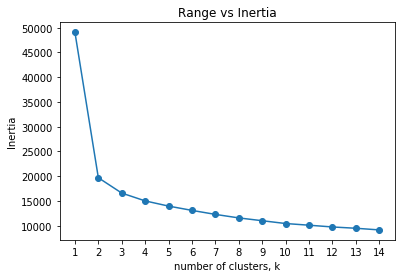

In [130]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.title('Range vs Inertia')
plt.xticks(ks)
plt.show()

The optimal number of clusters is determined by choosing an "elbow" in the inertia plot, or specificaly, the point where the intertia begins to decrease more slowly. The inertia appears to decrease more slowly in the above plot at 3, therefore, 3 would be the ideal number of clusters.

## Revise data variation

Apply standard deviation function for columns A2 through A10

In [131]:
df_std=df.std()
print(df_std)

A2     2.815741
A3     3.051459
A4     2.971913
A5     2.855379
A6     2.214300
A7     3.601852
A8     2.438364
A9     3.053634
A10    1.715078
dtype: float64


Plot standard deviation values in a graphic that displays all nine values and includes the titel, legend, ylabel and xlabel.

Text(0,0.5,'Standard Deviation')

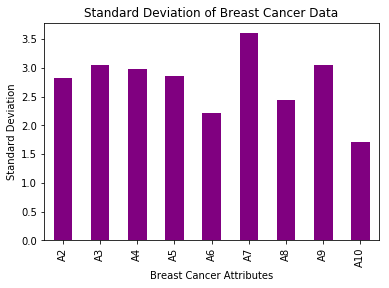

In [132]:
sp=df_std.plot.bar(color = 'purple')
sp.set_title('Standard Deviation of Breast Cancer Data')
sp.set_xlabel('Breast Cancer Attributes')
sp.set_ylabel('Standard Deviation')

## Capture how wide or narrow the variation is in each column.
Describe which features have a lot of variation.

## Implement Normalization

Use make_pipeline and Standard Scaler, and use n_cluster based on the optimal number of clusters (3) identified above.

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters=2)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(points)
labels=pipeline.predict(points)
centroids=kmeans.cluster_centers_
print(centroids)

[[-0.50155279 -0.61249516 -0.60963179 -0.52301352 -0.52309237 -0.58914655
  -0.5535666  -0.53362883 -0.30720688]
 [ 0.97149511  1.18638768  1.18084142  1.01306401  1.01321674  1.14116201
   1.07224455  1.0336256   0.59505198]]


Find and print centroids

In [134]:
centroids = model.cluster_centers_
print(centroids)

[[8.25       3.65       4.2        1.95       3.2        3.2272328
  4.2        2.4        2.85      ]
 [8.13043478 8.7826087  8.34782609 3.82608696 6.60869565 8.91304348
  5.91304348 2.17391304 1.52173913]
 [8.05       9.3        8.9        7.6        8.45       7.7
  6.8        8.95       8.85      ]
 [1.2459893  1.12299465 1.21390374 1.13903743 1.97326203 1.26881249
  1.98930481 1.06417112 1.10160428]
 [7.9        3.95       4.05       9.25       3.85       9.7
  5.4        3.8        2.        ]
 [4.11111111 3.11111111 3.33333333 3.22222222 4.27777778 3.75248088
  4.16666667 6.5        1.        ]
 [8.4375     7.625      6.6875     2.125      4.8125     3.721541
  4.375      8.875      2.0625    ]
 [7.04545455 8.59090909 8.18181818 6.22727273 5.31818182 3.20657527
  7.90909091 8.22727273 1.59090909]
 [3.92857143 6.53571429 6.35714286 7.96428571 6.         9.35714286
  6.67857143 7.03571429 2.67857143]
 [6.91891892 4.05405405 4.64864865 2.91891892 3.91891892 9.59459459
  4.37837838 